<a href="https://colab.research.google.com/github/brandonthimmesch/IMSE541/blob/main/SQC_Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Alex Courson

Jack Johnson

Brandon Thimmesch

IMSE 541 - Lab 5

4 October 2022

In [66]:
import math
import random
import scipy
import statistics
import numpy as np
import scipy.stats
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import plotly.graph_objects as go
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [67]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
# factor a is the blade length, b is support width, c is weight and the response is airtime
df = pd.read_csv('drive/My Drive/Colab Notebooks/SQC/SQC_Lab5_Data.csv', sep=',', na_values=".")
data = df.drop(columns = ['Unnamed: 0'])
data

,a,b,c,time
0,-1,-1,-1,2.28
1,-1,-1,1,2.21
2,-1,1,-1,2.63
3,-1,1,1,2.62
4,1,-1,-1,3.78
5,1,-1,1,2.71
6,1,1,-1,3.80
7,1,1,1,2.69
8,-1,-1,-1,2.37
9,-1,-1,1,2.91


In [69]:
#create a 3D surface plot for data visualization
#response on z axis is airtime
z = data.values #data values without heading
sh_0, sh_1 = z.shape # dimension of the data matrix or table
x1, x2 = np.linspace(-1, 1, sh_1), np.linspace(-1, 1, sh_1)
#print(x1)
#print(x2)
#print(z)
z2=data[['a','b','c']]
fig = go.Figure(data=[go.Surface(z=z2, x=x1, y=x2)])
fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True))
fig.update_layout(title='Surface Plot', autosize=False,
                  scene_camera_eye=dict(x=1.87, y=0.88, z=-0.64),
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90)
)
fig.update_layout(scene = dict(
                    xaxis_title='x1',
                    yaxis_title='x2',
                    zaxis_title='Air Time'),
                   )
fig.show()

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       24 non-null     int64  
 1   b       24 non-null     int64  
 2   c       24 non-null     int64  
 3   time    24 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 896.0 bytes


In [71]:
X=data[['a', 'b', 'c']]
X

,a,b,c
0,-1,-1,-1
1,-1,-1,1
2,-1,1,-1
3,-1,1,1
4,1,-1,-1
5,1,-1,1
6,1,1,-1
7,1,1,1
8,-1,-1,-1
9,-1,-1,1


In [72]:
# convert x1 and x2 input columns into a 2nd order polynomial matrix with intercept column 
# computation is done in numpy and convert it into Panda dataframe
xx=X.to_numpy()
poly= PolynomialFeatures(degree=3, interaction_only=True)
xxpd=pd.DataFrame(poly.fit_transform(xx), columns=['I', 'a', 'b', 'c','ab', 'ac', 'bc', 'abc']) #if interaction_only=False, then 1, a, b, a^2, ab, b^2
xxpd

,I,a,b,c,ab,ac,bc,abc
0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0
1,1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0
2,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0
3,1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0
4,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0
5,1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0
6,1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0
7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
8,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0
9,1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0


In [73]:
# generate model = b0 + b1a + b2b + b3c+ two factor interactions + b123abc
# this is a model for 2^k factorial design so 2nd order terms are not estimatable
X=xxpd[['a', 'b', 'c', 'ab', 'ac', 'bc', 'abc']]
X

,a,b,c,ab,ac,bc,abc
0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0
1,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0
2,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0
3,-1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0
4,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0
5,1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0
6,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0
7,1.0,1.0,1.0,1.0,1.0,1.0,1.0
8,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0
9,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0


In [74]:
# predicted response using skleran LinearRegression fit
Y=data[['time']]
regr=LinearRegression()
regr.fit(X,Y)
Yhat=regr.predict(X)
Yhat

array([[2.42666667],
       [2.64      ],
       [2.66      ],
       [2.41      ],
       [3.82333333],
       [3.08333333],
       [3.74      ],
       [2.79666667],
       [2.42666667],
       [2.64      ],
       [2.66      ],
       [2.41      ],
       [3.82333333],
       [3.08333333],
       [3.74      ],
       [2.79666667],
       [2.42666667],
       [2.64      ],
       [2.66      ],
       [2.41      ],
       [3.82333333],
       [3.08333333],
       [3.74      ],
       [2.79666667]])

In [98]:
predict = pd.DataFrame(Yhat, columns=['time']) 
predict['model'] = df['Unnamed: 0']
predict

,time,model
0,2.543333,SS1
1,2.525000,SS2
2,2.543333,SL1
3,2.525000,SL2
4,3.781667,LS1
5,2.940000,LS2
6,3.781667,LL1
7,2.940000,LL2
8,2.543333,SS1
9,2.525000,SS2


In [75]:
# add the column of 1s into the design matrix X
# another way is to reconstruct X using xxpd from the previous code cell
# X=xxpd[['I', 'x1', 'x2', 'x1x2']]
X = sm.add_constant(X)
X

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



,const,a,b,c,ab,ac,bc,abc
0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0
1,1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0
2,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0
3,1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0
4,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0
5,1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0
6,1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0
7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
8,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0
9,1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0


In [76]:
# two way anova table
model = ols('time ~ C(a) + C(b) + C(c) + C(a):C(c)', data=data).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(a),4.100267,1.0,78.112064,3.700729e-08
C(b),0.050417,1.0,0.960462,3.393856e-01
C(c),1.109400,1.0,21.134607,1.966889e-04
C(a):C(c),1.016817,1.0,19.370849,3.068577e-04
Residual,0.997350,19.0,NaN,NaN


In [77]:
# use statsmodels for OLS fitting and t statistics
# in this case, X is xxpd
model = sm.OLS(Y, X)
res=model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   time   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     19.79
Date:                Wed, 05 Oct 2022   Prob (F-statistic):           9.21e-07
Time:                        00:55:30   Log-Likelihood:                 7.4853
No. Observations:                  24   AIC:                             1.029
Df Residuals:                      16   BIC:                             10.45
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9475      0.044     66.558      0.0

From the t tests above, the significant factors are blade length (a) and weight (c) as they have the greatest coefficient magnitude meaning they have the greatest impact on airtime outcomes.

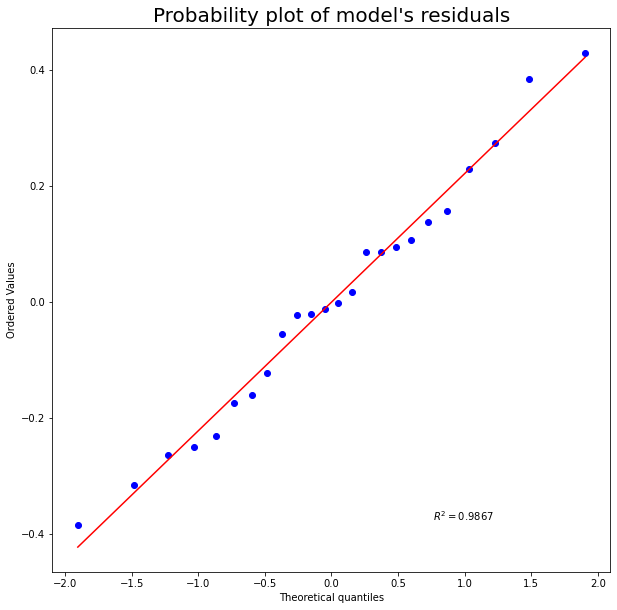

In [99]:
# Residual Analysis
# normal check

fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(res.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model's residuals", fontsize= 20)
ax.set

plt.show()

The above probability plot shows that the residuals pass the normality test and follow a normal distribution with 95% confidence.

In [79]:
# Homogeneity of Variance check for Factor a
# if the p value is small, reject H0 that the residuals have equal variance
# if the p value is large, cannot reject H0

stats.levene(data['time'][data['a'] == -1],
             data['time'][data['a'] == 1])

LeveneResult(statistic=7.156704573345322, pvalue=0.013825849048787602)

Since p value is very small, less than 0.05, we reject that the factor a (blade length) residuals have equal variance.

In [80]:
# Homogeneity of Variance check for Factor b
# if the p value is small, reject H0 that the residuals have equal variance
# if the p value is large, cannot reject H0

stats.levene(data['time'][data['b'] == -1],
             data['time'][data['b'] == 1])

LeveneResult(statistic=0.6035231118870892, pvalue=0.4455101993770104)

Since p value is very large, we fail to reject that factor b (support width) has equal variance.

In [81]:
# Homogeneity of Variance check for Factor c
# if the p value is small, reject H0 that the residuals have equal variance
# if the p value is large, cannot reject H0

stats.levene(data['time'][data['c'] == -1],
             data['time'][data['c'] == 1])

LeveneResult(statistic=22.39211152075745, pvalue=0.00010100181393264824)

Since p value is very small and nearly zero, we fail to reject that factor c (weight added) has equal variance.

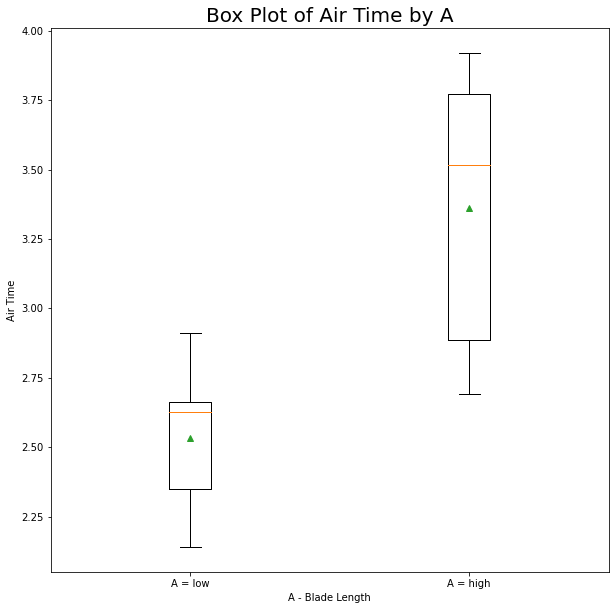

In [100]:
# Box plots by factor A
# If the IRQ=75% quartitle - 25% quartile are very different, then question the constant variance assumption
# If the F test p value is very small, we reject H0 and can use this box plot to identify the best factor level

fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Air Time by A", fontsize= 20)
ax.set

data2 = [data['time'][data['a'] == -1],
             data['time'][data['a'] == 1]]


ax.boxplot(data2,
           labels= ['A = low', 'A = high'],
           showmeans= True)

plt.xlabel("A - Blade Length")
plt.ylabel("Air Time")

plt.show()

Large blade length produced greater variability in airtime than small blade length. Additionally, large blade length yielded a greater mean air time than small blade length which suggests that it is a significant factor affecting air time.

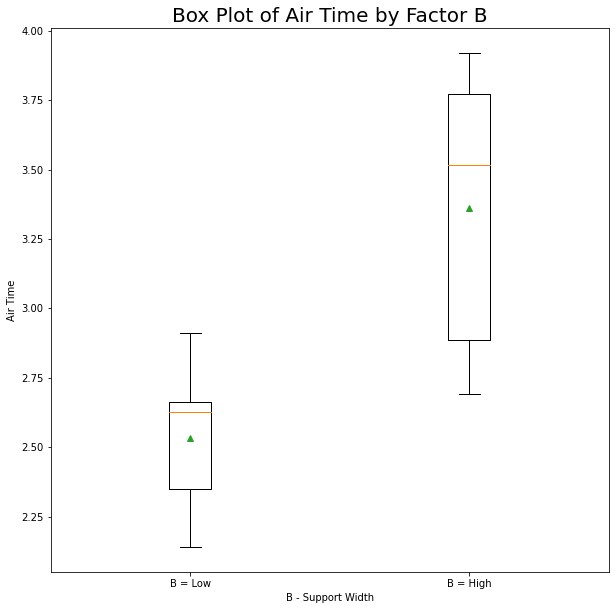

In [85]:
# Box plots by factor B
# same instruction as the previous factor 

fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Air Time by Factor B", fontsize= 20)
ax.set

data3 = [data['time'][data['b'] == -1],
             data['time'][data['b'] == 1]]


ax.boxplot(data2,
           labels= ['B = Low', 'B = High'],
           showmeans= True)

plt.xlabel("B - Support Width")
plt.ylabel("Air Time")

plt.show()

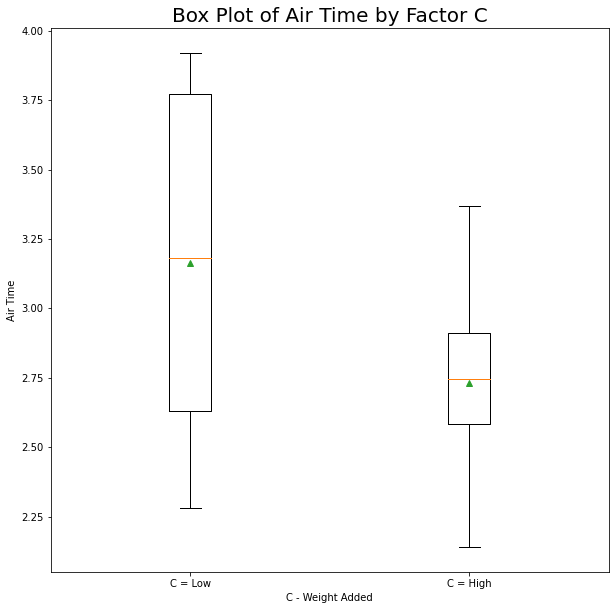

In [101]:
# Box plots by factor C
# same instruction as the previous factor Primer types

fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Air Time by Factor C", fontsize= 20)
ax.set

data2 = [data['time'][data['c'] == -1],
             data['time'][data['c'] == 1]]


ax.boxplot(data2,
           labels= ['C = Low', 'C = High'],
           showmeans= True)

plt.xlabel("C - Weight Added")
plt.ylabel("Air Time")

plt.show()

In [87]:
# adding observation order to data
data['order'] = range(1, len(data) + 1)
data

,a,b,c,time,order
0,-1,-1,-1,2.28,1
1,-1,-1,1,2.21,2
2,-1,1,-1,2.63,3
3,-1,1,1,2.62,4
4,1,-1,-1,3.78,5
5,1,-1,1,2.71,6
6,1,1,-1,3.80,7
7,1,1,1,2.69,8
8,-1,-1,-1,2.37,9
9,-1,-1,1,2.91,10


In [88]:
# testing the order for collecting observations 
N = len(Y)

order=data[['order']]
order=order.to_numpy() 
#the following step reduces the index in run_order by 1 so that the python index from 0 can function properly
order2=np.zeros(N) #order 2 is a list of zero
for i in range(N):
    order2[i]=order[i]-1 #assign the value of element in an array into the list


print('order of observations/residuals is')
print(order2)
# convert the array into a list for indexing
#order=order.reshape((1,N))
#order=order.tolist()
#print(order)

order of observations/residuals is
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23.]


In [89]:
res.resid

0    -0.146667
1    -0.430000
2    -0.030000
3     0.210000
4    -0.043333
5    -0.373333
6     0.060000
7    -0.106667
8    -0.056667
9     0.270000
10   -0.010000
11   -0.270000
12   -0.053333
13    0.086667
14   -0.080000
15   -0.016667
16    0.203333
17    0.160000
18    0.040000
19    0.060000
20    0.096667
21    0.286667
22    0.020000
23    0.123333
dtype: float64

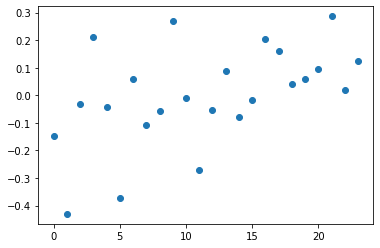

In [90]:
# Use the run order to reflect the sequence that we collected the data 
# if there is no pattern in the scatter plot, then don't reject independence assumption

eij=res.resid

x = range(0,N) # from the first collected obs to the last in order
y = eij[order2] # assign run order (see the previous code box)

plt.scatter(x, y)

The random order from the scatter plot above shows no pattern. If the data in the first half of the experiments are lower than 0 while those of the second half are above 0, then there is a bias in data collection. If the residuals are small in the beginning but graduately increase. Or vice versa. It is a concern as well. In these cases, independence assumption is violated. However, since none of these cases are present, it is safe to assume observation independence.

In [91]:
# running the reduced model with only A (blade length) and C (weight) since B (support width) is not significant

X=xxpd[['a', 'c', 'ac']]
X = sm.add_constant(X)
model = sm.OLS(Y, X)
res=model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   time   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     39.62
Date:                Wed, 05 Oct 2022   Prob (F-statistic):           1.33e-08
Time:                        00:56:34   Log-Likelihood:                 3.5222
No. Observations:                  24   AIC:                            0.9556
Df Residuals:                      20   BIC:                             5.668
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9475      0.047     63.087      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



In [92]:
# fit the regression 
Y=data[['time']]
regr=LinearRegression()
regr.fit(X,Y)
Yhat=regr.predict(X)
Yhat

array([[2.54333333],
       [2.525     ],
       [2.54333333],
       [2.525     ],
       [3.78166667],
       [2.94      ],
       [3.78166667],
       [2.94      ],
       [2.54333333],
       [2.525     ],
       [2.54333333],
       [2.525     ],
       [3.78166667],
       [2.94      ],
       [3.78166667],
       [2.94      ],
       [2.54333333],
       [2.525     ],
       [2.54333333],
       [2.525     ],
       [3.78166667],
       [2.94      ],
       [3.78166667],
       [2.94      ]])

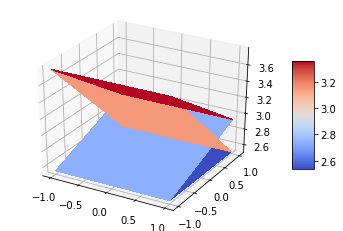

In [93]:
# 3 D plot of reduced model A, C and response airtime in Z axis
# Z axis is the predicted airtime Yhat

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x1=data['a']
x2=data['c']
x1, x2 = np.meshgrid(x1, x2)

# Plot the surface.
surf = ax.plot_surface(x1, x2, Yhat, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
#ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
#ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

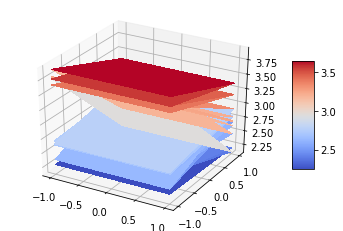

In [94]:
# 3 D plot of reduced model A, C, and air time in Z axis
# Z axis is the raw observation Y

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x1=data['a']
x2=data['c']
x1, x2 = np.meshgrid(x1, x2)

# Plot the surface.
surf = ax.plot_surface(x1, x2, Y, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
#ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
#ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()